In [2]:
import pandas as pd

all_data = pd.read_csv('../asos_train.csv', encoding='cp949')


relevant_loc = ['영암에프원태양광b']

asos_df = all_data[all_data['name'].isin(relevant_loc)]

asos_df['date'] = pd.to_datetime(asos_df['date'])
asos_df = asos_df[~((asos_df['date'].dt.month == 2) & (asos_df['date'].dt.day == 29))]

C:\Users\sedag\AppData\Local\Temp\ipykernel_26168\705814869.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asos_df['date'] = pd.to_datetime(asos_df['date'])


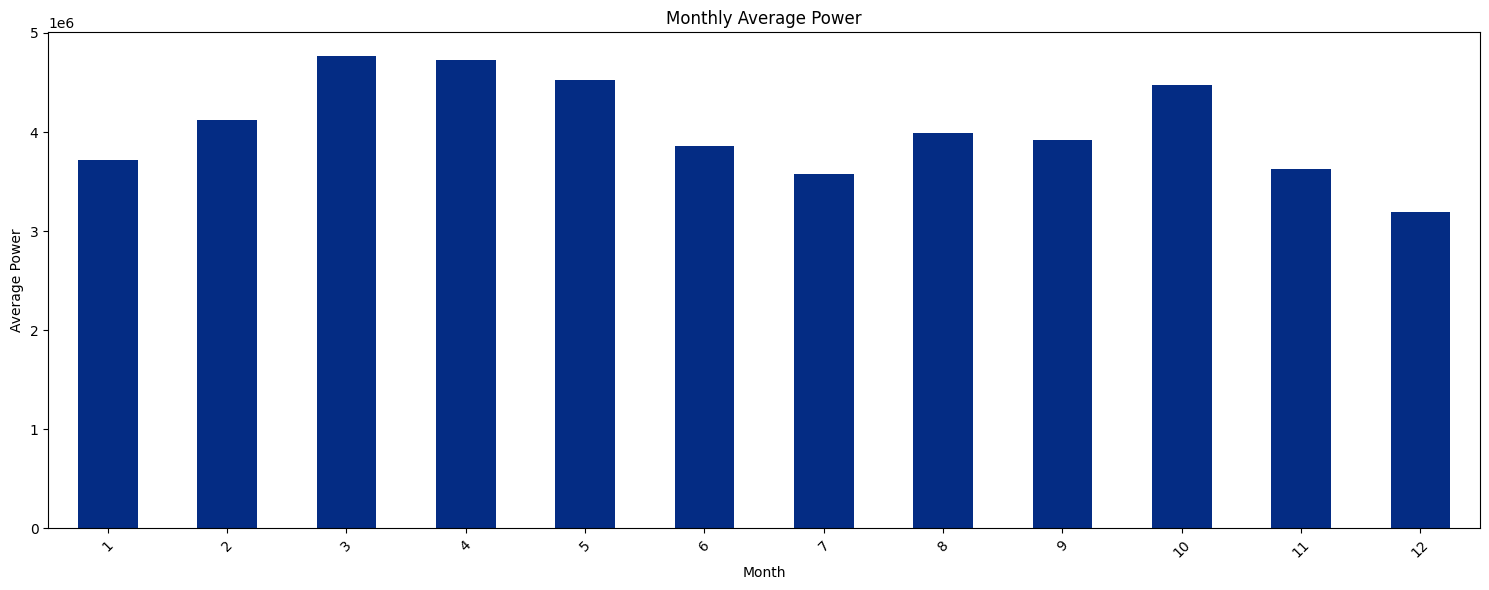

In [9]:
import matplotlib.pyplot as plt

monthly_avg = asos_df.groupby(asos_df['date'].dt.month)['power'].mean()

plt.figure(figsize=(15, 6))
monthly_avg.plot(kind='bar', color='#042c84')
plt.title("Monthly Average Power")
plt.xlabel("Month")
plt.ylabel("Average Power")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


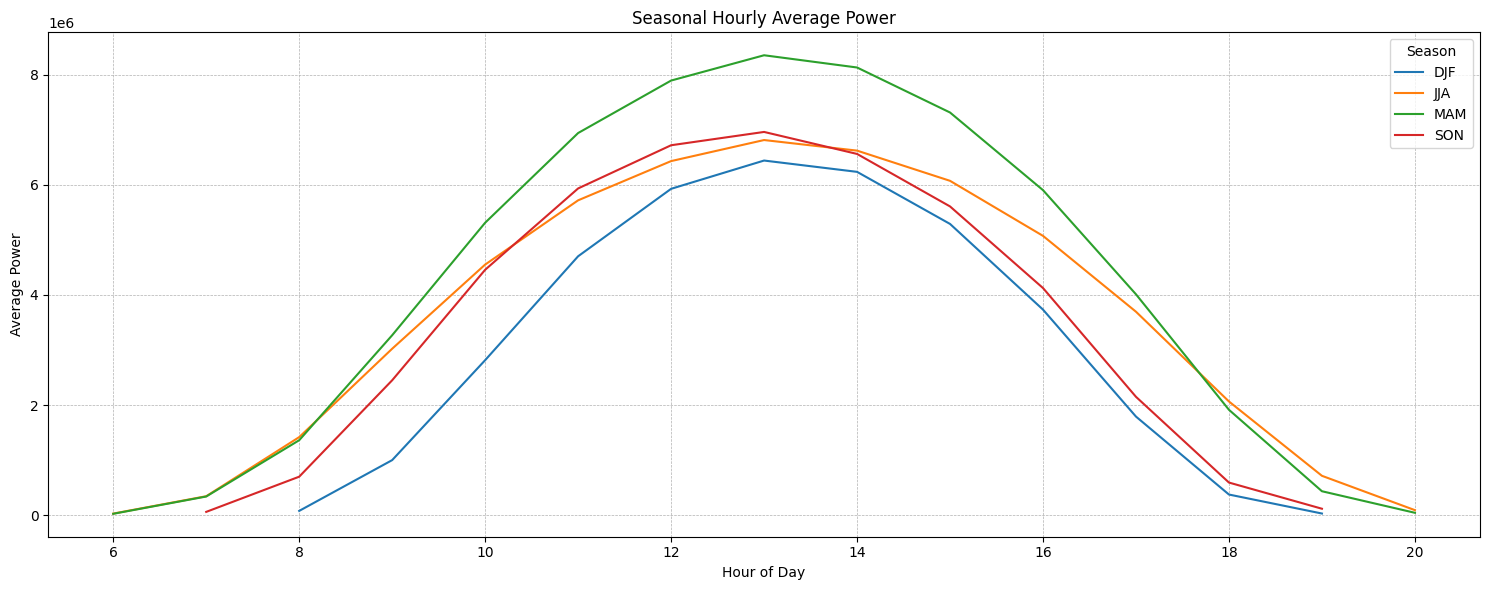

In [10]:
def season(month):
    if month in [12, 1, 2]:
        return 'DJF'
    elif month in [3, 4, 5]:
        return 'MAM'
    elif month in [6, 7, 8]:
        return 'JJA'
    else:
        return 'SON'

asos_df['season'] = asos_df['date'].dt.month.apply(season)
seasonal_time_avg = asos_df.groupby(['season', asos_df['date'].dt.hour])['power'].mean().unstack(level=0)

plt.figure(figsize=(15, 6))
seasonal_time_avg.plot(ax=plt.gca())
plt.title("Seasonal Hourly Average Power")
plt.xlabel("Hour of Day")
plt.ylabel("Average Power")
plt.legend(title="Season")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [11]:
asos_df.columns

Index(['power', 'date', 'name', 'capacities', 'asos_num', 'land', 'power/land',
       'location', 'Date/Time', 'Temp(C)', 'Prec(mm)', 'Wind_speed(m/s)',
       'Wind_Direction(16 compass points)', 'Humidity', 'Vapor_pressure(hPa)',
       'Dew_Point(C)', 'Local Atmospheric Pressure(hPa)',
       'Sea-level_Pressure(hPa)', 'sunshine(hr)', 'Solar_Radiation(MJ/m2)',
       'Snowfall(cm)', '3-hour_Fresh_Snowfall', 'Cloud_Cover(1/10)',
       'Mid-Low_Cloud_Cover', 'Cloud_Form', 'Lowest_Cloud_Height(100m)',
       'Visibility(10m)', 'Ground_Condition', 'Phenomenon_Number',
       'Ground Temp', '5cm_Underground_Temp', '10cm_Underground_Temp',
       '20cm_Underground_Temp', '30cm_Underground_Temp', 'season'],
      dtype='object')

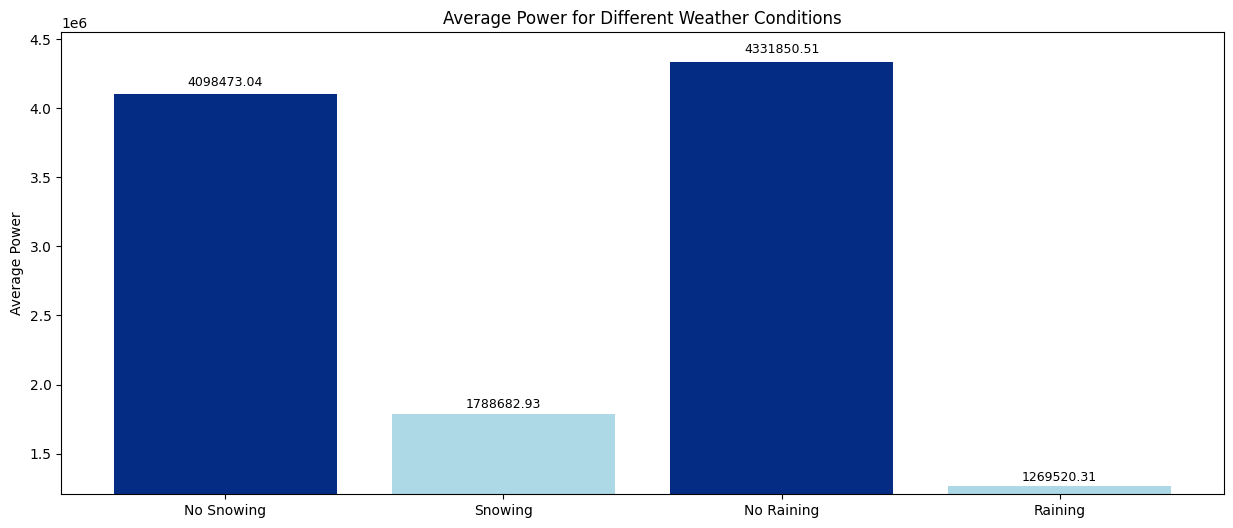

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate average power values for different conditions
snow_nan_mean = asos_df[asos_df['Snowfall(cm)'].isna()]['power'].mean()
snow_not_nan_mean = asos_df[~asos_df['Snowfall(cm)'].isna()]['power'].mean()

rain_nan_mean = asos_df[asos_df['Prec(mm)'].isna()]['power'].mean()
rain_not_nan_mean = asos_df[~asos_df['Prec(mm)'].isna()]['power'].mean()

# Data for bar chart
labels = ['No Snowing', 'Snowing', 'No Raining', 'Raining']
values = [snow_nan_mean, snow_not_nan_mean, rain_nan_mean, rain_not_nan_mean]
colors = ['#042c84', 'lightblue', '#042c84', 'lightblue']

# Create bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(labels, values, color=colors)
plt.ylabel('Average Power')
plt.title('Average Power for Different Weather Conditions')
plt.ylim(min(values) * 0.95, max(values) * 1.05)  # Add some padding for better visualization

# Display the exact value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height * 1.01, 
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()


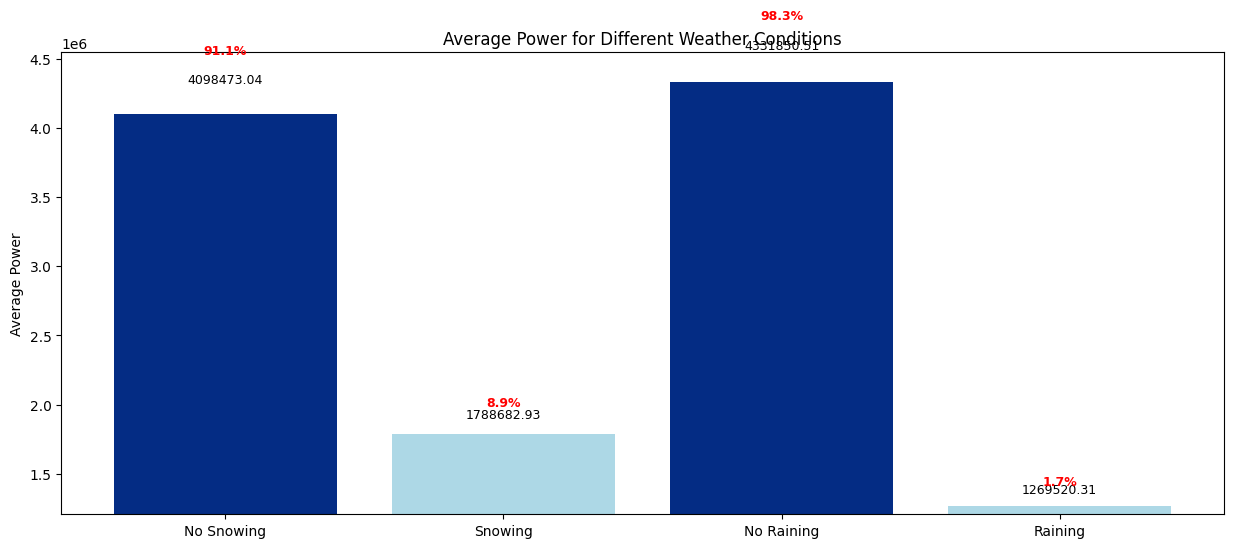

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate average power values for different conditions
snow_nan_mean = asos_df[asos_df['Snowfall(cm)'].isna()]['power'].mean()
snow_not_nan_mean = asos_df[~asos_df['Snowfall(cm)'].isna()]['power'].mean()

rain_nan_mean = asos_df[asos_df['Prec(mm)'].isna()]['power'].mean()
rain_not_nan_mean = asos_df[~asos_df['Prec(mm)'].isna()]['power'].mean()

# Data for bar chart
labels = ['No Snowing', 'Snowing', 'No Raining', 'Raining']
values = [snow_nan_mean, snow_not_nan_mean, rain_nan_mean, rain_not_nan_mean]
colors = ['#042c84', 'lightblue', '#042c84', 'lightblue']
percentages = ['91.1%', '8.9%', '98.3%', '1.7%']

# Create bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(labels, values, color=colors)
plt.ylabel('Average Power')
plt.title('Average Power for Different Weather Conditions')
plt.ylim(min(values) * 0.95, max(values) * 1.05)  # Add some padding for better visualization

# Display the exact value on top of each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height * 1.05, 
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)
    plt.text(bar.get_x() + bar.get_width() / 2, height * 1.10, 
             percentage, ha='center', va='bottom', fontsize=9, fontweight='bold', color='red')

plt.show()


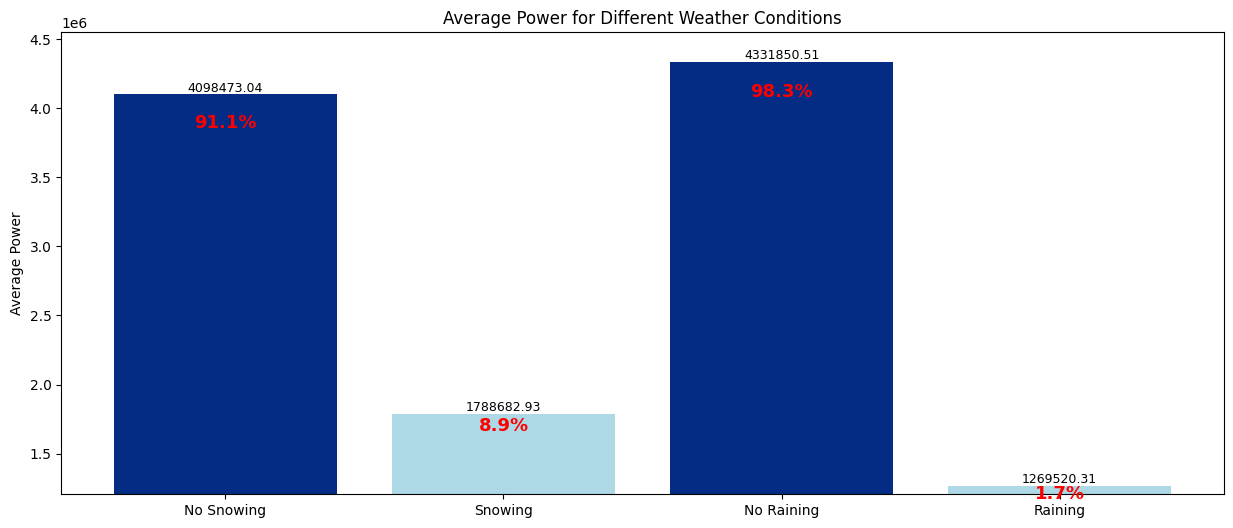

In [33]:
# Create bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(labels, values, color=colors)
plt.ylabel('Average Power')
plt.title('Average Power for Different Weather Conditions')
plt.ylim(min(values) * 0.95, max(values) * 1.05)  # Add some padding for better visualization

# Display the exact value and percentage inside each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    # Place the average value at the bottom third of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height * 1, 
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)
    # Place the percentage in the middle of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height * 0.95, 
             percentage, ha='center', va='center', fontsize=13, fontweight='bold', color='red')

plt.show()


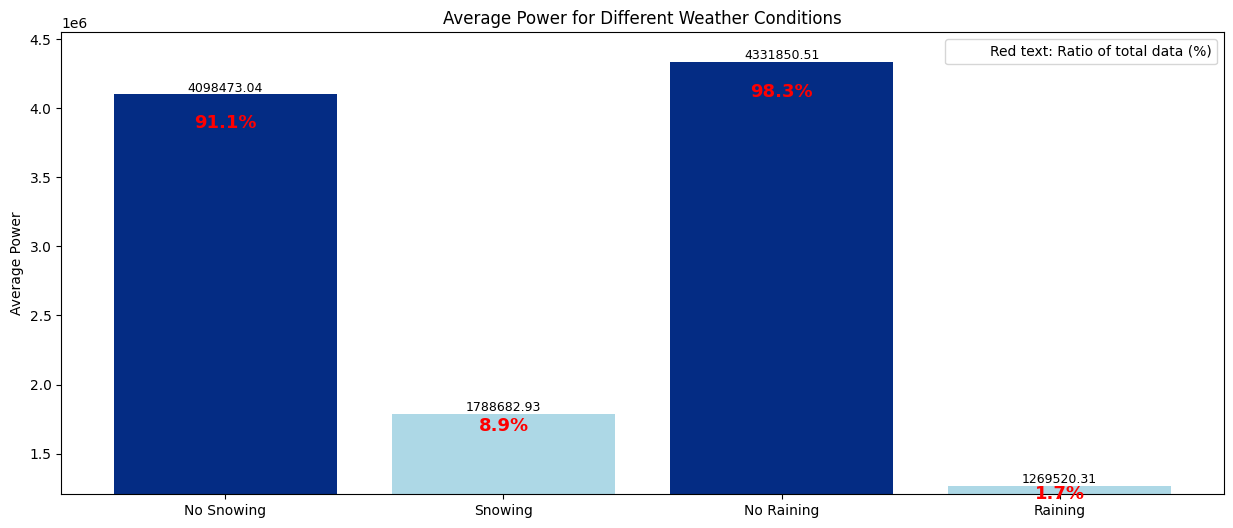

In [34]:
# Create bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(labels, values, color=colors)
plt.ylabel('Average Power')
plt.title('Average Power for Different Weather Conditions')
plt.ylim(min(values) * 0.95, max(values) * 1.05)  # Add some padding for better visualization

# Display the exact value and percentage inside each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    # Place the average value at the bottom third of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height * 1, 
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)
    # Place the percentage in the middle of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height * 0.95, 
             percentage, ha='center', va='center', fontsize=13, fontweight='bold', color='red')

# Create a legend using dummy data
plt.plot([], [], ' ', label="Red text: Ratio of total data (%)", color='red')
plt.legend(loc='upper right', fontsize=10)

plt.show()
